In [79]:
#import plotly.graph_objs as go
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"  # changer a vscode 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
# rajouter pour sauver  en  .csv
# A FAIRE, comparer l'import avec datareader
df_total = yf.download(tickers='^VIX', start="1998-01-01", end="2023-01-02",interval='1d')
df_total

# extraction de fichier csv
file_data_total =df_total.to_csv(index=True)



[*********************100%***********************]  1 of 1 completed


In [81]:
df_total.index

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=6291, freq=None)

In [82]:
# donnees pour l'indice S&P500
df_total_2 = yf.download(tickers='^GSPC', start="1998-01-01", end="2023-01-02",interval='1d')
df_total_2

file_data_total2 =df_total_2.to_csv(index=True)

[*********************100%***********************]  1 of 1 completed


In [83]:
# A FAIRE : SI DATE DE DEBUT < 1997-12-31 METTRE UN MESSAG 
#  le bon format  https://datatest.readthedocs.io/en/stable/how-to/date-time-str.html 
# validation d'entree des dates , avec la librairie datatest

# verfier que date_fin >= date_debut

date_debut = input(' tapez le debut:')

date_fin = input(' tapez la fin:')
while date_fin < date_debut :
  date_fin = input(' tapez la fin:')
  break
df=df_total.loc[date_debut:date_fin]
df

#VIX sur 2 ans

 tapez le debut:2018-01-01
 tapez la fin:2019-12-31


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.95,11.07,9.52,9.77,9.77,0
2018-01-03,9.56,9.65,8.94,9.15,9.15,0
2018-01-04,9.01,9.31,8.92,9.22,9.22,0
2018-01-05,9.10,9.54,9.00,9.22,9.22,0
2018-01-08,9.61,9.89,9.32,9.52,9.52,0
...,...,...,...,...,...,...
2019-12-24,12.65,12.84,12.56,12.67,12.67,0
2019-12-26,12.74,12.75,11.72,12.65,12.65,0
2019-12-27,12.61,13.72,11.89,13.43,13.43,0


In [130]:
# ici on valide que l'utilisateur respecte bien le format pour les dates avec la librairie datatest
!pip install datatest

from datetime import datetime
from datatest import validate


def strftime_format(format):
    def func(value):
        try:
            datetime.strptime(value, format)
        except ValueError:
            return False
        return True
    func.doc = f'should use date format {format}'
    return func

#data = ['2020-02-29', '03-17-2021', '2021-02-29', '2021-04-01']

data =[date_debut,date_fin]
validate(data, strftime_format('%Y-%m-%d'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# S&P500 sur 2 ans 
df_2=df_total_2.loc[date_debut:date_fin]
df_2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2429150000


In [85]:
import plotly.express as px

fig = px.scatter(df,  y="Close" ,title = 'VIX')
fig.update_layout(title_text='VIX', title_x=0.5)

fig.show()

In [86]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,subplot_titles=("VIX", "S&P500"))

fig.add_trace(
    go.Scatter(x=df.index, y= df['Close']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= df_2.index, y=df_2['Close']),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Graphs showing the negative relationship between  the VIX and S&P 500")
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()



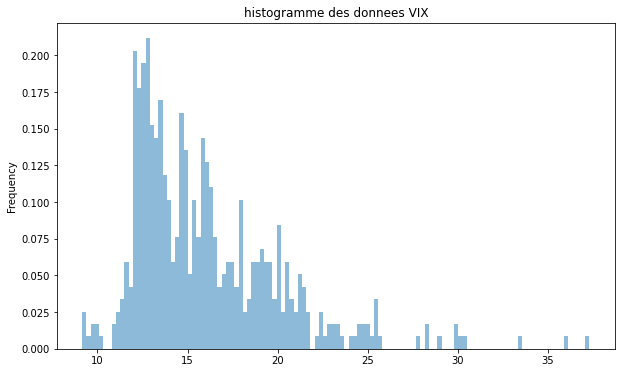

In [88]:
# data visualisation du VIX
ax = df['Close'].plot.hist(bins=120, alpha=0.5,density = True ,title= 'histogramme des donnees VIX')

In [89]:
# on presente les caracteristiques statistiques des donnees du VIX
df.agg(

    {

        "Close": ["min", "max", "median","mean","kurt" , "skew"],

        

    }

)

,Close
min,9.150000
max,37.320000
median,14.950000
mean,16.012604
kurt,3.521180
skew,1.525118


In [90]:
# data visualisation pour etudier les parametres p,q du modele
# acf = auto-correlation function 
'''autocorrelation'''
import statsmodels.api as sm
Close = df["Close"]

autocor = pd.Series(sm.tsa.stattools.acf(Close))

fig = px.bar(x = autocor.index, y = autocor, title='acf VIX')
fig.show()

In [92]:
# pacf = partial auto-coorelation function

'''autocorrelation'''
import statsmodels.api as sm
Close = df["Close"]

pautocor = pd.Series(sm.tsa.stattools.pacf(Close))

fig = px.bar(x = pautocor.index, y = pautocor)
fig.add_trace(px.line(x = pautocor.index, y = [1.96/np.sqrt(len(Close)) for i in pautocor.index]).data[0])
fig.add_trace(px.line(x = pautocor.index, y = [-1.96/np.sqrt(len(Close)) for i in pautocor.index]).data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig['data'][2]['line']['color']="#4BE8E0"
fig.show()

In [93]:
# Ici on regarde si la data est stationnaire , utilisant le test adfuller
# l'hypothese de base est que la data est non-stationnaire 


from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Close'], autolag="AIC")
print(dftest)

(-4.591723966072953, 0.00013378341917446513, 3, 499, {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}, 1917.8916015207071)


In [95]:
adf_results = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(adf_results)

Test Statistic                  -4.591724
p-value                          0.000134
#Lags Used                       3.000000
Number of Observations Used    499.000000
dtype: float64


In [96]:

critical_values=pd.Series(dftest[4] )
critical_values

1%    -3.443523
5%    -2.867350
10%   -2.569864
dtype: float64

In [97]:
#decision basee sur la p-value
if  adf_results[1]< 0.05:
  print('comme la p-value est inferieure au seuil de significance  0.05 on rejette l"hypothese de non-stationarite , la data est stationnaire')
else:
  print('on ne rejette pas l"hypothese , la data est non -stationnaire')  

comme la p-value est inferieure au seuil de significance  0.05 on rejette l"hypothese de non-stationarite , la data est stationnaire


In [99]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
# import numpy as np
# from sklearn.metrics import mean_squared_error

import pmdarima as pm
from pmdarima.arima import auto_arima 

In [101]:
 # on divise la data en train et test sets (train-test split)


#train_debut=date_debut
#train_fin= '2019-10-31'
train_debut=input(' tapez le debut du train :')
train_fin=input(' tapez la fin du train:')
while train_fin < train_debut :
  train_fin = input(' tapez la fin du train:')
  break

#test_debut = '2019-11-01'
#test_fin=date_fin
#train_fin= '2019-10-31'
#train_fin= '2019-10-31'
test_debut=input(' tapez le debut du test :')
test_fin=input(' tapez la fin du test:')
while test_fin < test_debut :
  test_fin = input(' tapez la fin du test:')
  break

# verfier que date_fin >= date_debut

# date_debut = input(' tapez le debut du test:')

# date_fin = input(' tapez la fin:')
# while date_fin < date_debut :
#   date_fin = input(' tapez la fin:')
#   break
# #df=df_total.loc[date_debut:date_fin]
# #df

# dataframes de train et test 

df_train=df.loc[train_debut:train_fin]
df_test= df.loc[test_debut:test_fin]

# auto_arima essaie plein de combinaisons pour les parametres p et q du modele arima 
arima = auto_arima(df_train["Close"], error_action='ignore', trace=True,
                   suppress_warnings=True, maxiter=30,
                   seasonal=False)


 tapez le debut du train :2018-01-01
 tapez la fin du train:2019-10-31
 tapez le debut du test :2019-11-01
 tapez la fin du test:2019-12-31
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1870.965, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3919.385, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3348.418, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1871.245, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1867.279, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1871.589, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1870.580, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1872.554, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1856.841, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AI

In [102]:
# une fois p,q determines, on fit le best model 
from statsmodels.tsa.arima.model import ARIMA
fitted_model = ARIMA(df_train['Close'],order =(1,0,1)).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [103]:
# sommaire du modele arima

# 
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  462
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -923.522
Date:                Tue, 21 Mar 2023   AIC                           1855.044
Time:                        17:08:37   BIC                           1871.586
Sample:                             0   HQIC                          1861.556
                                - 462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0355      1.271     12.615      0.000      13.544      18.527
ar.L1          0.9210      0.017     52.764      0.000       0.887       0.955
ma.L1         -0.0953      0.035     -2.718      0.0

**Prediction** 


In [104]:
fitted=fitted_model.fittedvalues

In [105]:
# metriques pour evaluer la precision du modele ARIMA sur le train set , MAE ,MAPE

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
MAE= mean_absolute_error(df_train['Close'],fitted)
MAPE = mean_absolute_percentage_error(df_train['Close'],fitted)
print(MAE,MAPE,1-MAPE)

1.0914934023130665 0.0626426998903059 0.9373573001096941


In [107]:
# on cree un dataframe avec les donnees brutes (raw) et fittees (modele)
import pandas as pd 
#comp = pd.Dataframe(data =[df['Close'],fitted],columns= [raw, fitted])
d = {'raw': df_train['Close'], 'fitted': fitted}
comp = pd.DataFrame(data=d)
comp

,raw,fitted
Date,,
2018-01-02,9.77,16.035502
2018-01-03,9.15,10.373436
2018-01-04,9.22,9.809459
2018-01-05,9.22,9.814366
2018-01-08,9.52,9.814837
...,...,...
2019-10-25,12.65,13.942459
2019-10-28,13.11,13.040518
2019-10-29,13.20,13.334392


In [108]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp.index, y= comp["raw"], name="VIX_train",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=comp.index, y=comp["fitted"], name="prediction",
                    line_shape='linear'))
fig.update_layout(title="<b>Comparaison de l'evolution du VIX et de sa prediction sur le train set ",title_x=0.5)
fig.show()

test set 


In [109]:
df_train.loc[train_fin,'Close']

13.220000267028809

In [110]:
# nombre de jours dans le test set 
df_test_len=len(df_test)
df_test_len

41

In [111]:
# prediction sur le test 

a=fitted_model.forecast(steps=df_test_len)
type(a)
a.values
a.items
df_test,a.values

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



(                 Open   High    Low  Close  Adj Close  Volume
 Date                                                         
 2019-11-01  12.500000  12.60  12.26  12.30      12.30       0
 2019-11-04  12.680000  13.13  12.44  12.83      12.83       0
 2019-11-05  12.850000  13.28  12.25  13.10      13.10       0
 2019-11-06  13.180000  13.39  12.60  12.62      12.62       0
 2019-11-07  12.590000  12.89  12.26  12.73      12.73       0
 2019-11-08  12.980000  13.05  12.00  12.07      12.07       0
 2019-11-11  13.150000  13.49  12.66  12.69      12.69       0
 2019-11-12  12.640000  13.10  12.36  12.68      12.68       0
 2019-11-13  12.910000  13.90  12.88  13.00      13.00       0
 2019-11-14  13.160000  13.81  12.93  13.05      13.05       0
 2019-11-15  12.950000  12.97  11.92  12.05      12.05       0
 2019-11-18  12.390000  13.10  12.32  12.46      12.46       0
 2019-11-19  12.330000  13.01  12.16  12.86      12.86       0
 2019-11-20  13.420000  14.17  12.61  12.78      12.78 

In [112]:
type(a)

pandas.core.series.Series

In [113]:
# on rajoute une colonne au dataframe du test set avec les predictions (forecasts)

df_test2 = df_test.copy(deep=True)
df_test2['forecasts'] = a.values

df_test2


,Open,High,Low,Close,Adj Close,Volume,forecasts
Date,,,,,,,
2019-11-01,12.500000,12.60,12.26,12.30,12.30,0,13.395445
2019-11-04,12.680000,13.13,12.44,12.83,12.83,0,13.603918
2019-11-05,12.850000,13.28,12.25,13.10,13.10,0,13.795930
2019-11-06,13.180000,13.39,12.60,12.62,12.62,0,13.972779
2019-11-07,12.590000,12.89,12.26,12.73,12.73,0,14.135663
2019-11-08,12.980000,13.05,12.00,12.07,12.07,0,14.285685
2019-11-11,13.150000,13.49,12.66,12.69,12.69,0,14.423860
2019-11-12,12.640000,13.10,12.36,12.68,12.68,0,14.551124
2019-11-13,12.910000,13.90,12.88,13.00,13.00,0,14.668339


In [115]:
# on forme les differences apr rapport aux jours precedents

# _ direct   signifie direction
df_test2['Close_direct']=df_test2['Close'].diff()
df_test2['forecasts_direct']=df_test2['forecasts'].diff()
df_test2

# cas particulier , 1ere valuer du test set ( / derniere valeur du train)
valeur_finale_train = df_train.loc[train_fin,'Close']
df_test2['Close_direct'].fillna(df_test2['Close']-valeur_finale_train, inplace=True)
df_test2['forecasts_direct'].fillna(df_test2['forecasts']-valeur_finale_train, inplace=True)

df_test2
df_test2['Close_Forecast_mult']= df_test2['Close_direct']*df_test2['forecasts_direct']
df_test2['directions']= df_test2['Close_Forecast_mult'].apply(lambda x: 1 if x > 0 else 0)   # accord sur la direction entre modele et data (1) ,autrement 0
df_test2
df_test2['Close_Hausse_Baisse']=df_test2['Close_direct'].apply(lambda x: 1 if x > 0 else -1)
df_test2
df_test2['forecasts_Hausse_Baisse']=df_test2['forecasts_direct'].apply(lambda x: 1 if x > 0 else -1)


df_test2


,Open,High,Low,Close,Adj Close,Volume,forecasts,Close_direct,forecasts_direct,Close_Forecast_mult,directions,Close_Hausse_Baisse,forecasts_Hausse_Baisse
Date,,,,,,,,,,,,,
2019-11-01,12.500000,12.60,12.26,12.30,12.30,0,13.395445,-0.920000,0.175445,-0.161409,0,-1,1
2019-11-04,12.680000,13.13,12.44,12.83,12.83,0,13.603918,0.530000,0.208474,0.110491,1,1,1
2019-11-05,12.850000,13.28,12.25,13.10,13.10,0,13.795930,0.270000,0.192011,0.051843,1,1,1
2019-11-06,13.180000,13.39,12.60,12.62,12.62,0,13.972779,-0.480000,0.176849,-0.084888,0,-1,1
2019-11-07,12.590000,12.89,12.26,12.73,12.73,0,14.135663,0.110000,0.162884,0.017917,1,1,1
2019-11-08,12.980000,13.05,12.00,12.07,12.07,0,14.285685,-0.660000,0.150022,-0.099014,0,-1,1
2019-11-11,13.150000,13.49,12.66,12.69,12.69,0,14.423860,0.620000,0.138175,0.085669,1,1,1
2019-11-12,12.640000,13.10,12.36,12.68,12.68,0,14.551124,-0.009999,0.127264,-0.001273,0,-1,1
2019-11-13,12.910000,13.90,12.88,13.00,13.00,0,14.668339,0.320000,0.117215,0.037509,1,1,1


In [116]:
# prediction de la valeur du VIX sur le test set 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test2.index, y= df_test2["Close"], name="VIX_test",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=df_test2.index, y=df_test2["forecasts"], name="prediction",
                    line_shape='linear'))
fig.update_yaxes(range = [5,40])
fig.update_layout(title="<b>Comparaison de l'evolution du VIX et de sa prediction",title_x=0.5)
fig.show()

In [117]:
import plotly.graph_objects as go

In [120]:
# resultats pour la prediction de la direction du VIX .data/modele arima : matrice de confusion

from sklearn.metrics import confusion_matrix
y_true = df_test2['Close_Hausse_Baisse']
y_pred = df_test2['forecasts_Hausse_Baisse']
confusion_matrix(y_true, y_pred)

array([[ 0, 20],
       [ 0, 21]])

In [121]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)
print('le nombre de True Negative est :', tn)
print('le nombre de Faux Positive est :', fp)
print('le nombre de Faux Negative est :', fn)
print('le nombre de True Positive est :', tp)




le nombre de True Negative est : 0
le nombre de Faux Positive est : 20
le nombre de Faux Negative est : 0
le nombre de True Positive est : 21


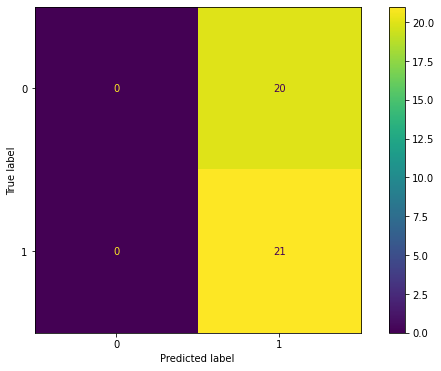

In [122]:
# pour le display de la matrice de confusion 
#1 = HAUSSE   0= BAISSE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [123]:
success_preds= df_test2[df_test2['directions']==1]['directions'].count()/len(df_test2['directions'])
print('la taux de succes sur la periode totale de test est :',success_preds)
fail_preds=1-success_preds
fail_preds 

la taux de succes sur la periode totale de test est : 0.5121951219512195


0.4878048780487805

In [124]:
import plotly.express as px

data = {'rate': [success_preds, 1-success_preds], 'category': ['Match', 'different']}
pd.DataFrame.from_dict(data)



,rate,category
0,0.512195,Match
1,0.487805,different


In [125]:

fig = px.pie(pd.DataFrame.from_dict(data), values='rate', names='category', title='taux de succes a predire la direction')
fig.update_layout(title_x=0.5)
fig.show()

In [126]:
# performance du modele ARIMA a predire la valeur du VIX sur le test set

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
MAE= mean_absolute_error(df_test2['Close'],df_test2['forecasts'])
MAPE = mean_absolute_percentage_error(df_test2['Close'],df_test2['forecasts'])
print(MAE,MAPE,1-MAPE)

2.120029894251687 0.16751824895134532 0.8324817510486546
